In [45]:
# 라이브러리 import

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve


pima_dt = pd.read_csv("./datasets/diabetes.csv")

In [35]:
pima_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
pima_dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
pima_dt["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
# 피쳐 레이블 지정

label = pima_dt["Outcome"]
feature = pima_dt.drop(["Outcome"], axis=1)
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# 데이터 스케일링

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()


In [40]:
# 훈련셋 테스트셋 분할

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=56)


In [50]:
# 로지스틱 알고리즘 이용해서 훈련 후 예측

lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:,1]

pred_proba

C:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.41440419, 0.70676199, 0.90464597, 0.85355193, 0.8399274 ,
       0.14292093, 0.09361728, 0.17734739, 0.85631501, 0.08144191,
       0.06940191, 0.04260167, 0.24690084, 0.08482174, 0.95450034,
       0.25256564, 0.79843367, 0.4949076 , 0.01203582, 0.90080951,
       0.71925161, 0.21610607, 0.10530128, 0.10994041, 0.12535374,
       0.72305742, 0.34819525, 0.23951914, 0.1190728 , 0.75705261,
       0.09205037, 0.19580351, 0.0170732 , 0.06065459, 0.50188859,
       0.19198038, 0.14367676, 0.16174863, 0.05250639, 0.18477878,
       0.13831377, 0.83204762, 0.14191367, 0.11459547, 0.08239991,
       0.06359397, 0.59730728, 0.49263756, 0.11632795, 0.46643098,
       0.0509079 , 0.09390616, 0.36286744, 0.4626061 , 0.0558565 ,
       0.90241786, 0.05598214, 0.04994412, 0.026788  , 0.42258381,
       0.33291767, 0.44765381, 0.74166829, 0.10573216, 0.1465683 ,
       0.51872783, 0.46460784, 0.6770752 , 0.66300486, 0.54243539,
       0.20954304, 0.06855139, 0.65815555, 0.38709431, 0.36263

In [57]:
def get_clf_eva(y_test, pred = None , pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(f"오차행렬 {confusion}, 정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}, f1스코어 : {f1}")
    
get_clf_eva(y_test,lr_pred,lr_pred_proba)

오차행렬 [[101  13]
 [ 12  28]], 정확도 : 0.8376623376623377, 정밀도 : 0.6829268292682927, 재현율 : 0.7, f1스코어 : 0.6913580246913581


In [63]:
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

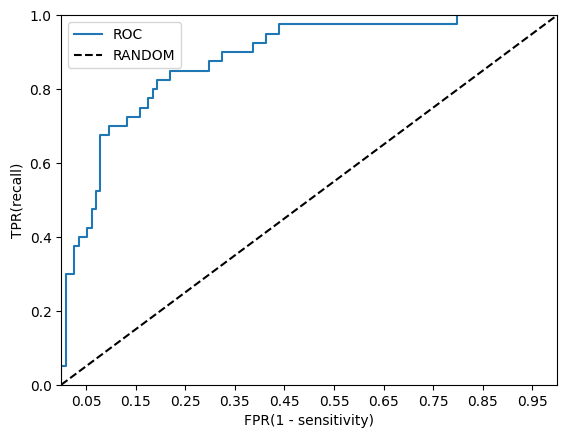

In [69]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

def roc_curve_plot (y_test, pred_proba_c1):
    
    # 임계값에 따른 fpr tpr값 반환
    fpr, tpr, threshold = roc_curve(y_test, pred_proba_c1)
    # roc를 플롯곡선으로 그림 
    plt.plot(fpr, tpr , label = "ROC")
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], "k--", label = "RANDOM")

    # fpr x축의 scale을 0.1 단위로 변경 + x축 y축 설명 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel("FPR(1 - sensitivity)");plt.ylabel("TPR(recall)")
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

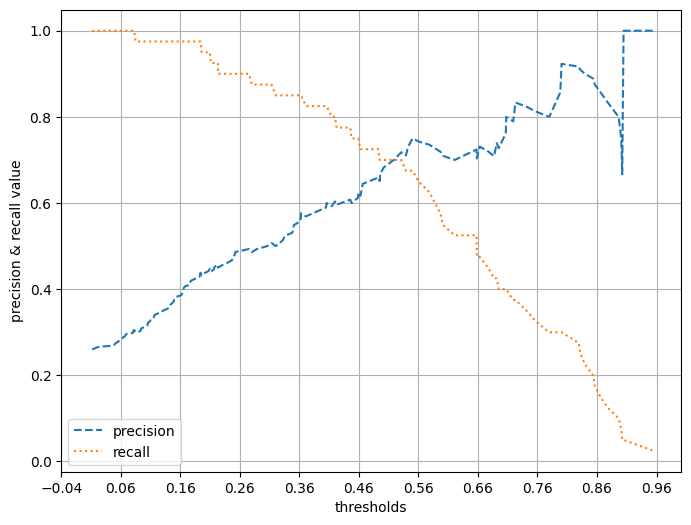

In [64]:
precision_recall_curve_plot(y_test,lr_pred_proba)

In [66]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, lr_pred_proba)
print(roc_score)

0.8798245614035087
